<a href="https://colab.research.google.com/github/tharenisankar/sample-project/blob/main/Another_copy_of_Clustering_using_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
parasharmanas_movie_recommendation_system_path = kagglehub.dataset_download('parasharmanas/movie-recommendation-system')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-recommendation-system/movies.csv
/kaggle/input/movie-recommendation-system/ratings.csv


In [ ]:
import pandas as pd,numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
data = pd.read_csv('/kaggle/input/movie-recommendation-system/movies.csv',index_col='movieId')
#MLB using python
cats = reduce(lambda a,b: a+b , list(map(lambda x: x.split('|') , data['genres'].ravel())))
cols = sorted(list(set(cats)))
info =[[int(c in row['genres']) for iter,row in data.iterrows()] for c in cols]
for col , row in zip(cols,info): data[col] = row
data

<ipython-input-3-5783af018775>:8: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cats = reduce(lambda a,b: a+b , list(map(lambda x: x.split('|') , data['genres'].ravel())))


,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209157,We (2018),Drama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209159,Window of the Soul (2001),Documentary,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
209163,Bad Poems (2018),Comedy|Drama,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Kmeans elbow method implemented by sklearn and python

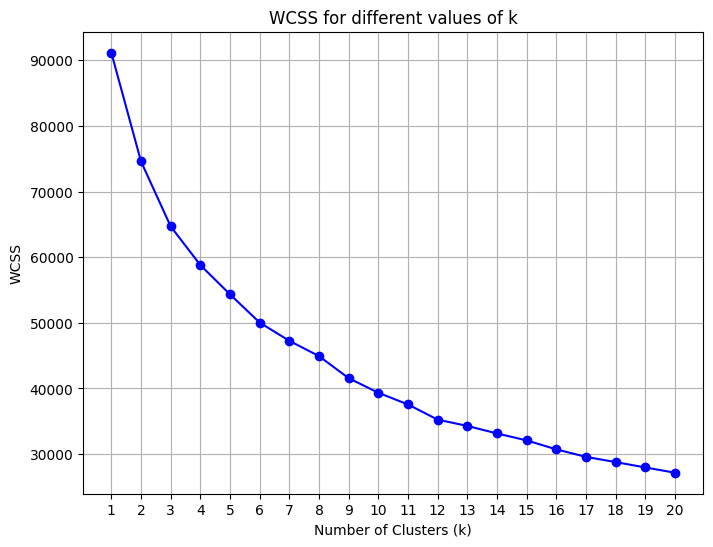

In [ ]:
wcss = []
X=data[cols]

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=20, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), wcss, marker='o', linestyle='-', color='b')
plt.title('WCSS for different values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

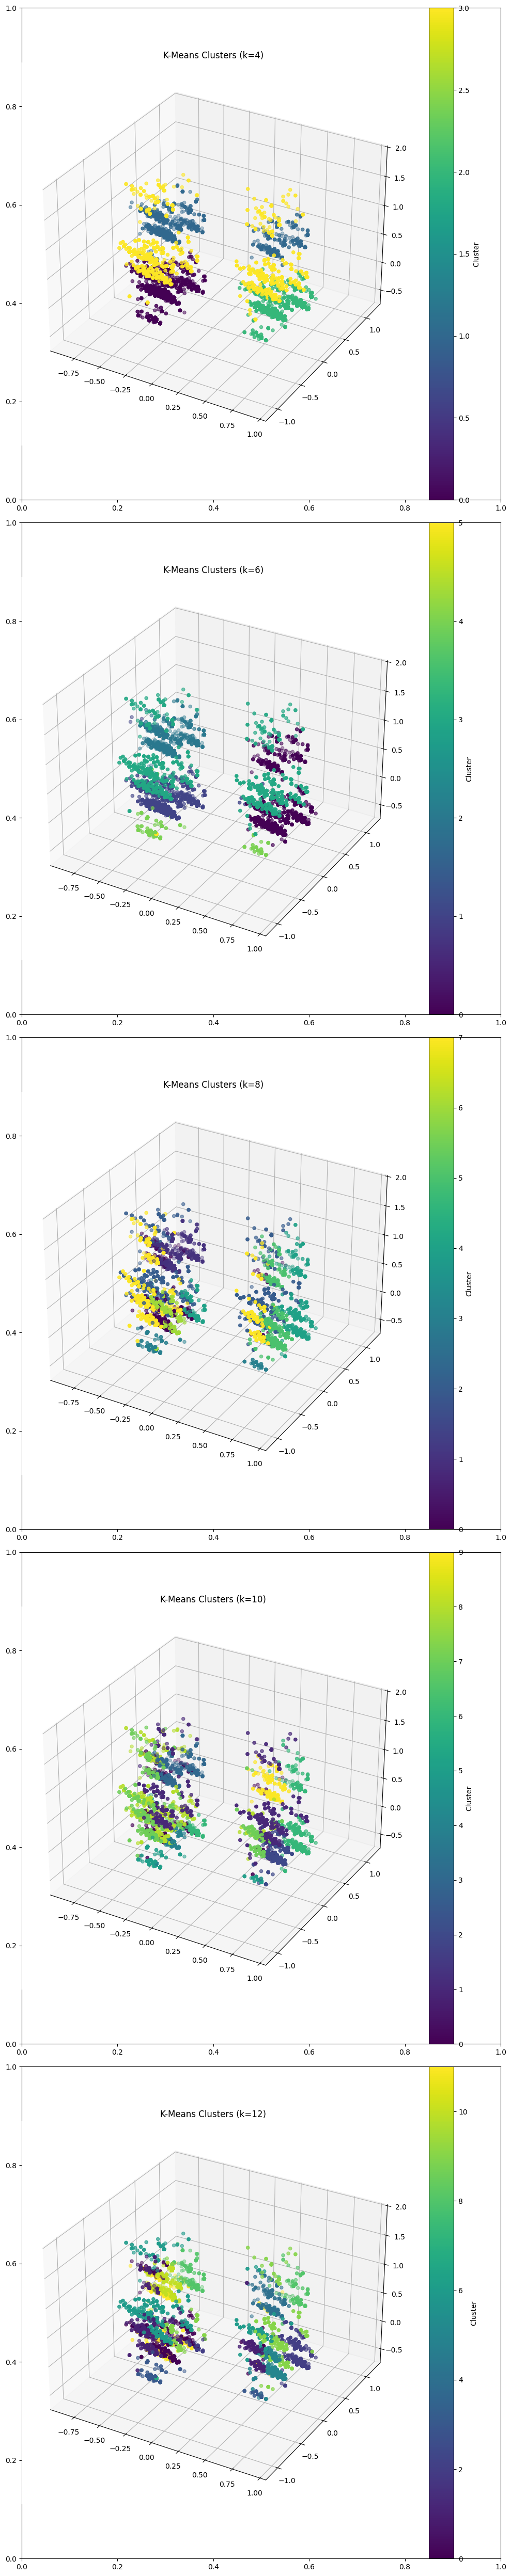

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(10, 50))
for i, k in enumerate([4, 6, 8, 10, 12]):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=20, random_state=0)
    kmeans.fit(X)
    data['Cluster'] = kmeans.labels_
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    ax = axes[i]
    ax = fig.add_subplot(5, 1, i + 1, projection='3d')
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=data['Cluster'], cmap='viridis')
    ax.set_title(f'K-Means Clusters (k={k})')
    fig.colorbar(scatter, ax=ax, label='Cluster')
plt.tight_layout()
plt.show()
fig.savefig('file.pdf')